# Import Modules

In [ ]:
# Import the libraries we'll be using.
import numpy as np      # For array operations
import cv2              # OpenCV for computer vision functions
import matplotlib.pyplot as plt  # For displaying images
import plotly.graph_objects as go  # For interactive visualizations

**Notebook setup**

Don't change the cells in this section... except if you know what you're doing! (it is used to style some of the other cells).

In [ ]:
%%html

<style>
.exercise {
    color:#132743;
    background:#AFE4FE;
    padding:10px;
    border-radius:10px;
}

.highlight {
    color:#ff6f3c;
    # background:#ff9a3c;
    font-size: 1.3rem;
    font-weight: bold;
    font-style: italic;
    text-align: center;
    padding:10px;
    border-radius:10px;
}

.theory-box {
    color:#2E3440;
    background:#E5E9F0;
    padding:15px;
    border-left: 5px solid #5E81AC;
    border-radius:5px;
    margin: 15px 0px;
}

.hint-box {
    color:#2E3440;
    background:#EBCB8B40;
    padding:15px;
    border-left: 5px solid #EBCB8B;
    border-radius:5px;
    margin: 15px 0px;
}

.pitfall-box {
    color:#2E3440;
    background:#BF616A30;
    padding:15px;
    border-left: 5px solid #BF616A;
    border-radius:5px;
    margin: 15px 0px;
}

.summary-box {
    color:#2E3440;
    background:#A3BE8C30;
    padding:15px;
    border-left: 5px solid #A3BE8C;
    border-radius:5px;
    margin: 15px 0px;
}
</style>

# Functions

In [107]:
def convert_uint8_to_float32(inp):
    return (inp / 255.).astype(np.float32)

def convert_float32_to_uint8(inp):
    return (inp * 255.).astype(np.uint8)

# ACV Part 1: Image Manipulation and Transformation

In this first part, we'll learn how to transform images at the pixel level using NumPy and OpenCV. By the end of this notebook, you'll be able to take a basic image and apply various transformations to it.

<p style="display:flex; flex-flow:row nowrap; align-items:center; font-size:2rem">
From
<img src="data/fish_base.jpg" alt="base image" width="256px" style="margin:20px"/>
To 
<img src="nb_data/fish_toon.jpg" alt="drawing" width="256px" style="margin:20px"/>
!
</p> 

## Learning Objectives

- **Understand image representation**: Learn how computers interpret and store images as arrays of numbers
- **Master basic image operations**: Crop, fill, blend, and mask images using NumPy
- **Manipulate pixel values**: Adjust contrast, color balance, and work with different color spaces
- **Apply image filters**: Use convolutions to blur, sharpen, and detect edges in images
- **Transform images spatially**: Resize, rotate, and warp images

This knowledge will form the foundation for developing your own AI-based photobooth application!

## 1. Image basics: NumPy vs OpenCV

In this section, we'll explore how images are represented in computer memory and how to manipulate them using two powerful libraries: NumPy and OpenCV.

<div class="theory-box">
<h3>Key Concepts</h3>
<p><strong>Images as arrays</strong>: At their core, digital images are just multi-dimensional arrays of numbers. Each number represents the intensity of a pixel at a specific position and color channel.</p>

**Resources**

**OpenCV**:  
- https://docs.opencv.org/4.6.0/
- https://docs.opencv.org/4.6.0/d6/d00/tutorial_py_root.html

**NumPy**:  
- https://numpy.org/doc/stable/index.html  
- https://www.w3resource.com/numpy/data-types.php  
- https://numpy.org/doc/stable/user/absolute_beginners.html

In [2]:
# Please create a new env and use pip to install the required libraries.
# !pip install numpy opencv-python matplotlib plotly

### 1.1 Read / Display / Write images

Let's start by learning how to load, display, and save images using both Matplotlib and OpenCV.

In [4]:
# Read images using matplotlib - returns RGB format by default
fish = plt.imread('data/fish_base.jpg')
glasses = plt.imread('data/glasses.png')

# Read using opencv - returns BGR format by default (note this difference for later!)
cv_fish = cv2.imread('data/fish_base.jpg')

In [5]:
type(fish), type(glasses), type(cv_fish)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

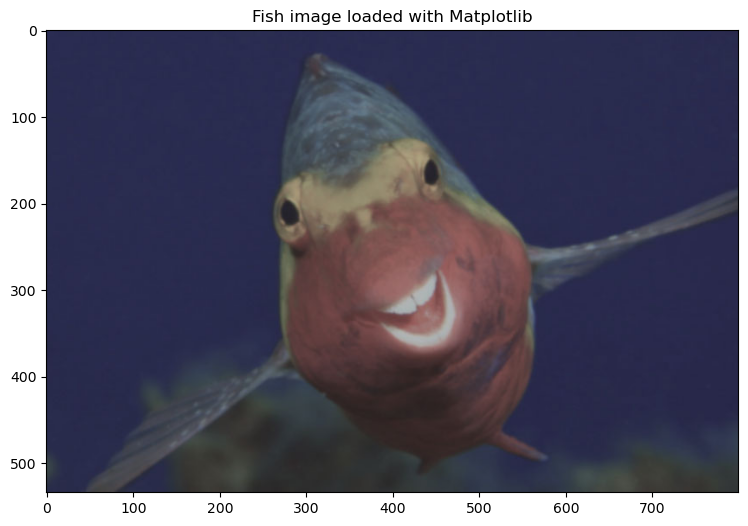

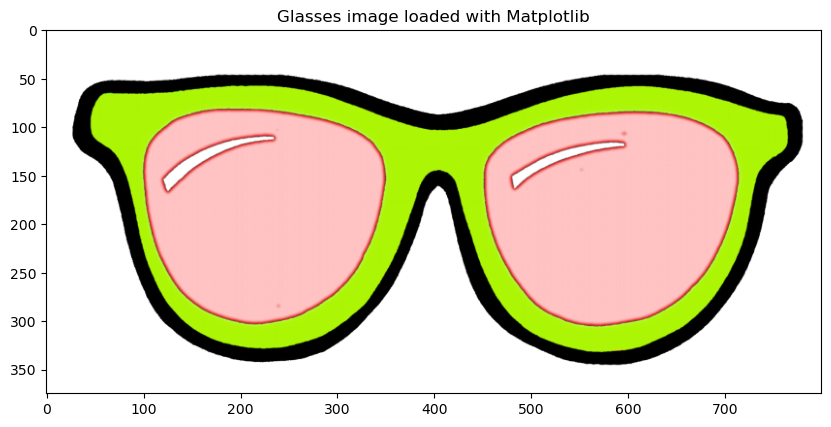

In [6]:
# Display images using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(fish)
plt.title('Fish image loaded with Matplotlib')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(glasses)
plt.title('Glasses image loaded with Matplotlib')
plt.show()

In [7]:
# Display image using OpenCV
# This opens a separate window outside the notebook
cv2.imshow('Fish image loaded with OpenCV', cv_fish)

# DO NOT CLOSE THE WINDOW MANUALLY or you will need to restart the kernel, 
# just clic on the new window and press any key to close it

cv2.waitKey(0)
# Destroy the window
cv2.destroyWindow('Fish image loaded with OpenCV')

### Understanding `cv2.waitKey(0)`
<p>The <code>waitKey()</code> function waits for a key event for a specified number of milliseconds:</p>
<ul>
    <li><code>waitKey(0)</code>: Waits indefinitely until any key is pressed</li>
    <li><code>waitKey(1000)</code>: Waits for 1 second (1000 ms) or until a key is pressed, whichever comes first</li>
</ul>
<p>This function is essential when displaying images with OpenCV because it keeps the window open and gives control to the operating system to handle events.</p>
</div>

In [8]:
# How to write an image to disk:

# Using OpenCV (saves in BGR format)
cv2.imwrite('mycvimage.png', cv_fish)

# Using matplotlib (saves in RGB format)
plt.imsave('myimage.png', fish)

<div class="exercise">
<h4>Exercise 1.1</h4>
<ul>
    <li>What is the parameter "0" doing in the <code>waitKey()</code> function?</li>
    <li>Complete the function below that listens for a specific key being pressed to close the window<br>
    <em>(you can use the <a href="https://initialcommit.com/blog/python-ord-function"><code>ord()</code></a> method to retrieve the Unicode value for any particular key):</li>
</ul>
</div>

<div class="hint-box">
<h4>Hint</h4>
<p>The <code>ord()</code> function converts a character to its Unicode code point (an integer). For example, <code>ord('q')</code> returns 113.</p>
<p>You'll need to use a loop that continues until the specific key is pressed.</p>
</div>

In [29]:
def show_image(img, window_title="HelloWorld", key_close="q"):
    """
    Display the image in an external window and wait for a specific keypress to close the window

    Arguments:
        img (np.ndarray): the image to display
        window_title (string)[Optional]: Specify the title of the window. Defaults to "HelloWorld"
        key_close (string)[Optional]: Specify the key that should be pressed to kill the window. Defaults to "q"
    """
    # your code starts here

    cv2.imshow(window_title, img)

    while cv2.waitKey(10) & 0xFF != ord(key_close):
        pass
    
    # Destroy the window
    cv2.destroyWindow(window_title)
    
    # your code ends here


# run the function, the same image should be displayed as previously, but this time only 'q' should close the window
show_image(cv_fish, window_title="Press 'q' to quit", key_close="q")

<div class="pitfall-box">
<h4>Common Pitfall</h4>
<p>A common mistake is to use <code>waitKey()</code> without checking its return value. Remember that <code>waitKey()</code> returns the ASCII value of the key pressed, or -1 if no key was pressed within the specified time.</p>
<p>Also, on some systems, you may need to use <code>waitKey(0) & 0xFF</code> to extract only the relevant byte, especially when working with special keys.</p>
</div>

### 1.2 Image structure

It is essential to understand how an image is interpreted by our computer programs. Let's begin by displaying some properties of the fish image:

In [30]:
print(f"type(fish): {type(fish)}")  # The type of the image object
print(f"fish.dtype: {fish.dtype}")  # The data type of the pixel values
print(f"fish.shape = {fish.shape}") # The dimensions of the image (height, width, channels)

type(fish): <class 'numpy.ndarray'>
fish.dtype: uint8
fish.shape = (534, 800, 3)


<div class="theory-box">
<h3>Understanding Image Structure</h3>
<p>An image in computer memory is just a 3D array of numbers:</p>
<ul>
    <li><strong>First dimension (height)</strong>: Number of rows (from top to bottom)</li>
    <li><strong>Second dimension (width)</strong>: Number of columns (from left to right)</li>
    <li><strong>Third dimension (channels)</strong>: Color information (typically 3 for RGB or BGR)</li>
</ul>
<p>The <code>uint8</code> data type means "unsigned integers stored on 8 bits (1 byte)", ranging from 0 to 255. This is standard for everyday camera images.</p>
<p>For example, a pixel value of [255, 0, 0] in RGB format represents pure red, while [0, 255, 0] represents pure green.</p>
</div>

<div class="exercise">
<h4>Exercise 1.2.1</h4>
<ul>
    <li>What is a pixel?</li>
    <li>As has been done with the fish image, display the shape and the data type of the image with the glasses in the cell below. What do you observe?</li>
    <li>What are the main differences between an image being stored in the <code>uint8</code> format vs the <code>float32</code> format?</li>
</ul>
</div>

In [31]:
# your code starts here
print(f"type(fish): {type(glasses)}")
print(f"fish.dtype: {glasses.dtype}")
print(f"fish.shape = {glasses.shape}")
# your code ends here

type(fish): <class 'numpy.ndarray'>
fish.dtype: float32
fish.shape = (375, 800, 4)


- Smallest unit in an image reprensitng a point or saqure of one color.
- The glasses has 4 channels, only 375 rows and store the data in float32.
- uint8 can stores only 256 values, all integers. Float32 represents more values and deciamls

<details>
<summary>[SPOILER] Answers to Exercise 1.2.1</summary>
<div class="theory-box">
<p><strong>What is a pixel?</strong><br>
A pixel (short for "picture element") is the smallest unit of a digital image. It represents a single point in the image and contains color/intensity information. In a color image, each pixel typically has multiple values (channels) representing different color components (e.g., Red, Green, Blue).</p>

<p><strong>Observation about glasses image:</strong><br>
The glasses image has 4 channels instead of 3. The first 3 are RGB (color information), and the 4th channel is alpha (transparency information).</p>

<p><strong>uint8 vs float32:</strong><br>
<ul>
    <li><strong>uint8</strong>: 8-bit unsigned integers (0-255)
        <ul>
            <li>Advantages: Memory efficient (1 byte per value), standard format for most image files</li>
            <li>Limitations: Limited precision, can lead to rounding errors in calculations</li>
        </ul>
    </li>
    <li><strong>float32</strong>: 32-bit floating-point numbers
        <ul>
            <li>Advantages: Higher precision, better for mathematical operations, can represent values outside 0-255 range</li>
            <li>Limitations: Uses more memory (4 bytes per value), must be converted back to uint8 for display or saving</li>
        </ul>
    </li>
</ul>
When performing image processing operations, it's often beneficial to convert to float32, do the calculations, then convert back to uint8 for display.</p>
</div>
</details>




Notice how the image with the glasses has 4 channels (3rd value in the shape tuple). This 4th dimension contains information about `image transparency`:

  * 0.0 --> completely transparent
  * 1.0 --> opaque _(can also be 255 depending on the pixel's data type)_

Just a quick experiment before moving to the next part : 

<div class="highlight">
    Are the <code>plt.imshow()</code> and <code>cv2.imshow()</code> methods the same?
</div>

In the following cell we use pyplot to display the image imported with OpenCV (ie: `cv_fish`):

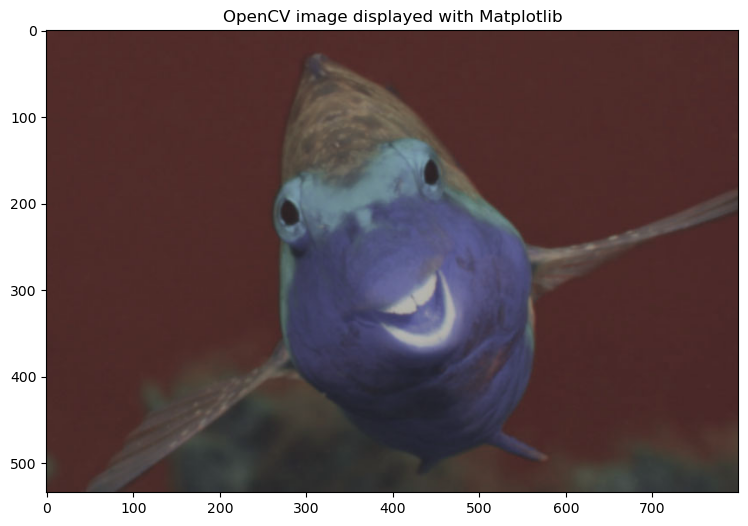

In [32]:
plt.figure(figsize=(10, 6))
plt.imshow(cv_fish)
plt.title('OpenCV image displayed with Matplotlib')
plt.show()

**What happened??!**

<div class="pitfall-box">
<h4>RGB vs BGR Color Order</h4>
<p>For historical reasons, OpenCV defaults to the BGR format instead of the usual RGB... the red and blue channels are inverted!</p>
<p>When you load an image with <code>cv2.imread()</code>, it's in BGR format. But when you display it with <code>plt.imshow()</code>, Matplotlib expects RGB format.</p>
<p>This is why the colors look wrong when displaying an OpenCV image with Matplotlib. Always be aware of which color format you're working with!</p>
</div>

As far as pyplot is concerned, it only sees arrays of numbers and doesn't mind plotting the disordered channels. Be careful with this as you might end up transforming the wrong channels if you're not careful! It's a good habit to display your transformed image at each step of the transformation process.

Let's check that the channels are indeed inverted by plotting the first pixel value located at position (0,0) in the two images (the one in the top left corner):

In [47]:
print(f"cv2.imread(): cv_fish[0,0,:] = {cv_fish[0,0,:]}	[B G R]")
print(f"plt.imread(): fish[0,0,:]    = {fish[0,0,:]}	[R G B]")

cv2.imread(): cv_fish[0,0,:] = [81 43 41]	[B G R]
plt.imread(): fish[0,0,:]    = [41 43 81]	[R G B]


<div class="exercise">
<h4>Exercise 1.2.2</h4>
Write a function to handle the image display for us and invert the RGB channels if necessary. Write an other function to diplay basic information about an image. 

USE THOSE FUNCTIONS AT EVERY STEP DURING YOUR WORK!
</div>

Image type: <class 'numpy.ndarray'>
Image data type: uint8
Image shape: (534, 800, 3)
Min value: 31
Max value: 184


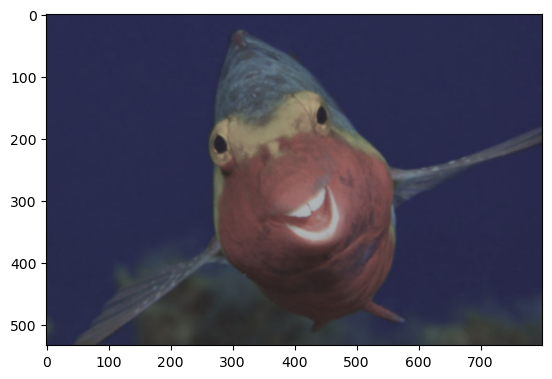

In [ ]:
# you might want to copy this function in a cell at the top of the notebook
# in case you have to restart the kernel and reload the entire notebook

def display_image(image, convert_bgr_to_rgb=False):
    """ Display the image using matplotlib

    Arguments:
        image (np.ndarray): the image to display
        convert_bgr_to_rgb (bool)[Optional]: Set this to True when image comes from OpenCV imread
    """
    # Your code here
    if convert_bgr_to_rgb:
        plt.imshow(image[:,:,::-1])
    else:
        plt.imshow(image)

def display_image2(image, convert_bgr_to_rgb=False):
    rgb_image = np.copy(image)
    if convert_bgr_to_rgb:
        rgb_image[:,:,0], rgb_image[:,:,2] = image[:,:,2], image[:,:,0] #swap R and B channels

    plt.figure(figsize=(10, 6))
    plt.imshow(rgb_image)
    plt.show()

    
def image_info(image):
    """ Display basic information about an image
    
    Arguments:
        image (np.ndarray): the image to analyze
    """
    print('Image type:', type(image))
    print('Image data type:', image.dtype)
    print('Image shape:', image.shape)
    print('Min value:', image.min())
    print('Max value:', image.max())
    
# Test our functions
image_info(fish)
display_image(cv_fish, True)  # Convert BGR to RGB for proper display

<div class="summary-box">
<h3>Section Summary Image Basics</h3>
<p>In this section, we've learned the fundamentals:</p>
<ul>
    <li>How to read, display, and write images using both Matplotlib and OpenCV</li>
    <li>The structure of digital images as multi-dimensional arrays</li>
    <li>The difference between RGB (Matplotlib) and BGR (OpenCV) color formats</li>
    <li>How to handle image display with proper color conversion</li>
    <li>The importance of understanding image data types and their implications</li>
</ul>

### 1.3 Crop, Fill, Blend, Mask

Now that we understand the basics of image representation, let's learn how to perform fundamental image operations using NumPy array manipulation. These operations form the building blocks for more complex image transformations.

In [50]:
# Import the images (in case you have to reload the notebook)
fish = plt.imread('data/fish_base.jpg')
glasses = plt.imread('data/glasses.png')

<div class="theory-box">
<h3>Basic Image Operations</h3>
<p>We will see four fundamental operations we can perform on images using NumPy:</p>
<ul>
    <li><strong>Crop</strong>: Extract a portion of an image using array slicing</li>
    <li><strong>Fill</strong>: Replace pixel values in specific regions</li>
    <li><strong>Blend</strong>: Combine two images with different weights</li>
    <li><strong>Mask</strong>: Use a binary or grayscale mask to selectively transform an image</li>
</ul>
<p>These operations leverage NumPy's powerful array manipulation capabilities and form the foundation for more complex image processing techniques.</p>
</div>

<div class="exercise">
<h4>Exercise 1.3</h4>
<strong>Crop:</strong> Display only a 256x256 pixel area in the center of the fish image<br>
<img src="./nb_data/cropped_fish.jpg" style="width:100px; margin:10px" >
</div>

<div class="hint-box">
<h4>Hint: Image Cropping</h4>
<p>To crop an image in NumPy, you need to:</p>
<ol>
    <li>Determine the center point of the image</li>
    <li>Calculate the starting and ending indices for your crop</li>
    <li>Use array slicing to extract the region</li>
</ol>
<p>Remember that images are indexed as [height, width, channels], so you'll need to calculate the crop boundaries for both height and width.</p>
</div>

Image type: <class 'numpy.ndarray'>
Image data type: uint8
Image shape: (256, 256, 3)
Min value: 31
Max value: 184


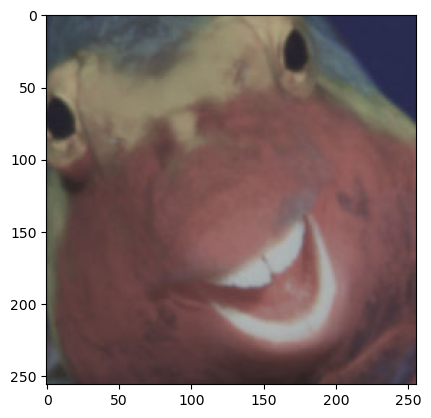

In [55]:
# Define the size of the cropped area
px = 256
half_px = px//2  # integer division, also called "floor division" as it floors the result of the division 
                 # -> very important to keep in mind when working with pixels!

# your code starts here
center_height = fish.shape[0]//2
center_width = fish.shape[1]//2

heights = [center_height - half_px, center_height + half_px]
widths = [center_width - half_px, center_width + half_px]

cropped_image = fish[heights[0]:heights[1], widths[0]:widths[1], :]
image_info(cropped_image)
display_image(cropped_image)
# your code ends here

<div class="theory-box">
<h3>Understanding Array Slicing for Image Cropping</h3>
<p>When we use <code>fish[half_height-half_px : half_height+half_px, half_width-half_px : half_width+half_px, :]</code>, we're performing array slicing in three dimensions:</p>
<ul>
    <li>First dimension (height): From <code>half_height-half_px</code> to <code>half_height+half_px</code></li>
    <li>Second dimension (width): From <code>half_width-half_px</code> to <code>half_width+half_px</code></li>
    <li>Third dimension (channels): All channels (indicated by <code>:</code>)</li>
</ul>
<p>This creates a new array containing only the specified region of the original image.</p>
</div>

<div class="exercise">
<h4>Exercise 1.4</h4>
<strong>Fill:</strong> Draw a big red "+" sign on the fish image.<br>
<img src="./nb_data/plus_fish.jpg" style="width:200px; margin:10px" >
</div>

<div class="hint-box">
<h4>Hint: Image Filling</h4>
<p>To draw a "+" sign, you need to:</p>
<ol>
    <li>Create a copy of the original image to avoid modifying it</li>
    <li>Define the dimensions of the horizontal and vertical bars</li>
    <li>Use array slicing to replace pixel values in those regions</li>
</ol>
<p>Remember that RGB colors are represented as [R, G, B] arrays, so [255, 50, 50] would be a bright red color.</p>
</div>

Image type: <class 'numpy.ndarray'>
Image data type: uint8
Image shape: (534, 800, 3)
Min value: 0
Max value: 255


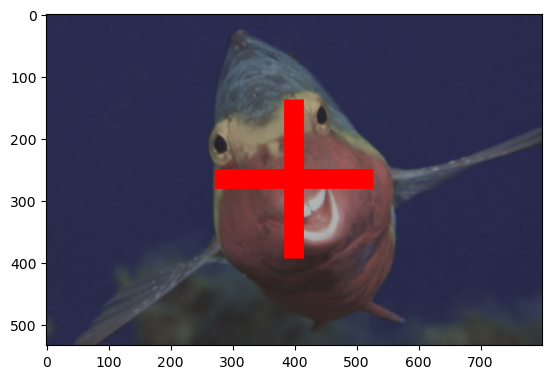

In [61]:
# Create a copy of the original image to avoid modifying it
plus_fish = fish.copy()

# your code starts here
cross_dim = 256
cross_width = 32
half_px = cross_dim//2

start_height, end_height = fish.shape[0]//2 - half_px, fish.shape[0]//2 + half_px
start_length, end_length = fish.shape[1]//2 - half_px, fish.shape[1]//2 + half_px

plus_fish[start_height:end_height, fish.shape[1]//2 - cross_width//2:fish.shape[1]//2 + cross_width//2, :] = [255,0,0]
plus_fish[fish.shape[0]//2 - cross_width//2:fish.shape[0]//2 + cross_width//2, start_length:end_length, :] = [255,0,0]

image_info(plus_fish)
display_image(plus_fish)

# your code ends here


<div class="pitfall-box">
<h4>Common Pitfall: Modifying Original Images</h4>
<p>When working with images in NumPy, remember that assignment operations modify the array in-place. If you don't want to modify your original image, always create a copy first with <code>image.copy()</code>.</p>
<p>This is especially important when you're experimenting with different transformations or need to reuse the original image later.</p>
</div>

<div class="exercise">
<h4>Exercise 1.5</h4>
<strong>Blend:</strong> Display the result of mixing 30% <code>upscale_rgb_glasses</code> to 70% <code>fish</code> images.<br>
You will first need to overcome the shape mismatch between the <code>fish</code> and the <code>glasses</code> images, before you can combine them.<br>
<img src="./nb_data/glasses_fish.jpg" style="width:200px; margin:10px" >
</div>

<div class="theory-box">
<h3>Image Blending</h3>
<p>Image blending combines two images using a weighted average:</p>
<p><code>blended_image = α × image1 + (1-α) × image2</code></p>
<p>where α is a value between 0 and 1 that determines the contribution of each image.</p>
<p>Before blending, both images must have the same dimensions. If they don't, we need to resize or pad one of them to match the other.</p>
</div>

Image type: <class 'numpy.ndarray'>
Image data type: uint8
Image shape: (534, 800, 3)
Min value: 0
Max value: 255


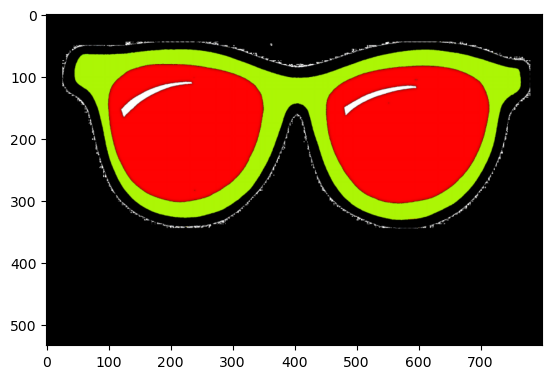

In [135]:
# You code for casting the fish and glasses image to the same shape here (name the new glasses image upscale_rgb_glasses)
height_diff = fish.shape[0] - glasses.shape[0]
width_diff = fish.shape[1] - glasses.shape[1]

#pad to match the fiss size
upscale_rgb_glasses = np.pad(glasses, ((0,height_diff),(0,width_diff),(0,0)), mode="constant", constant_values=0)

#ca st to uint8
upscale_rgb_glasses = convert_float32_to_uint8(upscale_rgb_glasses[:,:,:3])
image_info(upscale_rgb_glasses)
display_image(upscale_rgb_glasses)

Now that we have both images with the same dimensions, we can blend them together:

Image type: <class 'numpy.ndarray'>
Image data type: uint8
Image shape: (534, 800, 3)
Min value: 22
Max value: 198


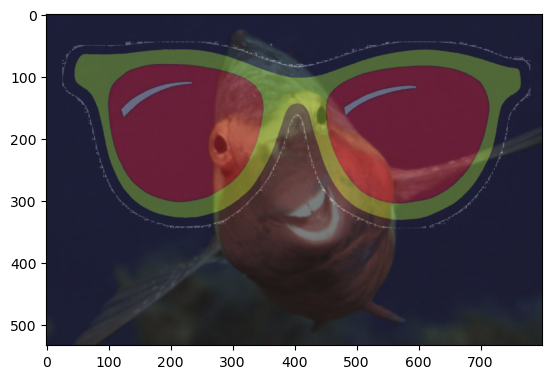

In [136]:
# Your code for combining both images here
alpha = 0.3
blended_image = alpha * upscale_rgb_glasses + (1 - alpha) * fish.copy()
blended_image = np.clip(blended_image.astype(np.uint8), 0, 255)

image_info(blended_image)
display_image(blended_image)

<div class="pitfall-box">
<h4>Potential Issue: Integer Overflow</h4>
<p>When blending images, be careful about potential overflow. If you add pixel values that sum to more than 255 (or 1 if type is float), you'll get unexpected results due to overflow.</p>
<p>To avoid this, you can use <code>np.clip(result, 0, 255)</code> to ensure values stay in the valid range.</li>
</ol>
<p>In our example, we're safe because 0.7*255 + 0.3*255 = 255, but with different weights, this could be an issue.</p>
</div>

<div class="exercise">
<h4>Exercise 1.6</h4>
<strong>Mask:</strong> Use an <code>upscale_alpha_glasses</code> image as weights to compute the weighted mean of <code>upscale_rgb_glasses</code> and <code>fish</code>. This operation is often referred to as <code>alpha_blending</code>.<br>
<img src="./nb_data/masked_fish.jpg" style="width:200px; margin:10px" >
</div>

<div class="theory-box">
<h3>Alpha Blending</h3>
<p>Alpha blending is a more sophisticated form of image blending that uses a transparency mask (the alpha channel) to determine how much each image contributes to each pixel:</p>
<p><code>result = foreground × alpha + background × (1-alpha)</code></p>
<p>where <code>alpha</code> is a value between 0 and 1 for each pixel:</p>
<ul>
    <li>alpha = 1: Use only the foreground pixel</li>
    <li>alpha = 0: Use only the background pixel</li>
    <li>alpha = 0.5: Equal mix of foreground and background</li>
</ul>
<p>This allows for smooth transitions and partial transparency effects.</p>
</div>

Image type: <class 'numpy.ndarray'>
Image data type: uint8
Image shape: (534, 800, 3)
Min value: 0
Max value: 255


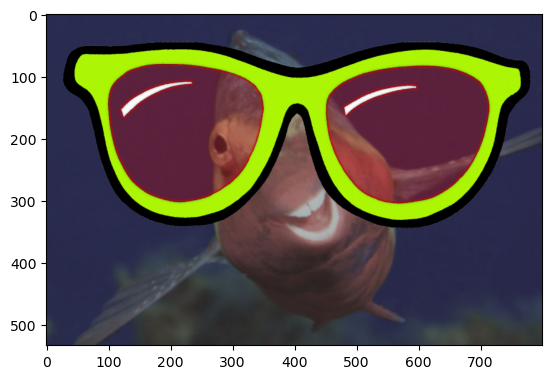

In [144]:
# Display the results and make sure that all the images have the same size

#take the alpha channel
upscale_alpha_glasses = glasses.copy()[:,:,-1]
#expand to match the size of the fish
upscale_alpha_glasses = np.pad(upscale_alpha_glasses, ((0,height_diff),(0, width_diff)), mode="constant", constant_values=0)

#for computation needs to be a data cube
upscale_alpha_glasses_rgb = np.expand_dims(upscale_alpha_glasses, 2)
#repeats the layer for each color channel
upscale_alpha_glasses_rgb = np.concatenate( (upscale_alpha_glasses_rgb, upscale_alpha_glasses_rgb, upscale_alpha_glasses_rgb), axis=2)

#alpha blending
blended_image_2 = upscale_rgb_glasses * upscale_alpha_glasses_rgb + fish * (1 - upscale_alpha_glasses_rgb)
#cast types to uint8
blended_image_2 = blended_image_2.astype(np.uint8)

image_info(blended_image_2)
display_image(blended_image_2)

Now let's perform the alpha blending:

In [145]:
# Your code here
# see code above


<div class="hint-box">
<h4>Vectorized Operations</h4>
<p>The channel-by-channel approach above works, but FYI, NumPy offers a more concise way using broadcasting:</p>
<pre>
masked_fish = (fish * (1-upscale_alpha_glasses[:,:,np.newaxis]) + 
               upscale_rgb_glasses * upscale_alpha_glasses[:,:,np.newaxis]).astype(np.uint8)
</pre>
<p>This adds a new axis to the alpha channel to make it compatible with the 3-channel images, then performs the blending in a single operation.</p>
</div>

<div class="exercise">
<h4>Exercise 1.7</h4>
Turn the previous code that does the alpha blending of two images into a function (you may need this for your photoboot project!).
</div>

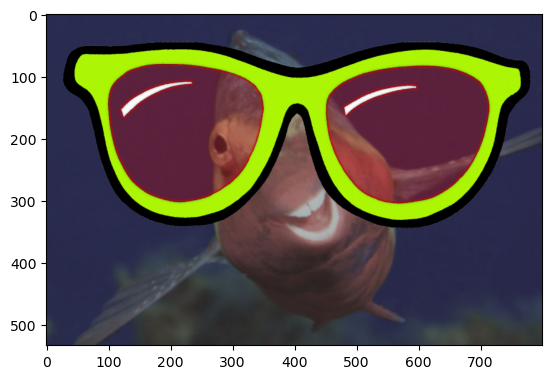

In [148]:
def composite_image(imageA: np.ndarray, imageB: np.ndarray, mask: np.ndarray) -> np.ndarray:
    """ Blend two images using an alpha mask
    
    Arguments:
        imageA (np.ndarray): Background image
        imageB (np.ndarray): Foreground image
        mask (np.ndarray): Alpha mask with values in range [0, 1]
        
    Returns:
        np.ndarray: The blended image
    """
    mask_channels = mask[..., np.newaxis]
    # Your code here
    blended_image = (
        imageA * (1 - mask_channels) +
        imageB * mask_channels
    ).astype(np.uint8)

    return blended_image


# Test the function
result = composite_image(fish, upscale_rgb_glasses, upscale_alpha_glasses)
display_image(result)

### Understanding `np.newaxis` and Ellipsis (`...`)
<div class="theory-box">
<p><code>np.newaxis</code> is used to add a new dimension to an array. In our function, we use it to make the 2D mask compatible with the 3D images.</p>
<p>The ellipsis (<code>...</code>) is a shorthand that means "all existing dimensions". So <code>mask[..., np.newaxis]</code> means "keep all existing dimensions of mask and add a new one at the end".</p>
<p>This is equivalent to <code>mask[:,:,np.newaxis]</code> for a 2D mask, but the ellipsis notation is more flexible as it works regardless of how many dimensions the input has.</p>
</div>

<div class="summary-box">
<h3>Section summary: Basic Image Operations</h3>
<p>In this section, we've learned how to:</p>
<ul>
    <li><strong>Crop</strong> images by selecting specific regions using array slicing</li>
    <li><strong>Fill</strong> regions of an image with specific colors</li>
    <li><strong>Blend</strong> two images using weighted averaging</li>
    <li><strong>Use the alpha channel</strong> and alpha blending for smooth transitions</li>
</ul>
<p>These fundamental operations can be combined in various ways to create more complex image manipulations and effects.</p>
</div>

## 2. Manipulating Pixel Values

In this section, we'll explore how to modify the actual values of pixels to enhance images and create interesting effects. By the end of this section, you'll be able to create a composite image of the fish wearing glasses with:

- "Improved" (that may vary from your pov) image quality of the fish
- Glasses with infinite colors using hue shifting!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Import the images (in case you have to reload the notebook)
fish = plt.imread('data/fish_base.jpg')
glasses = plt.imread('data/glasses.png')

In [ ]:
# Utility functions for channel manipulation
def split_channels(image):
    """ Split an image into its individual channels
    
    Arguments:
        image (np.ndarray): The image to split
        
    Returns:
        generator: A generator yielding each channel
    """
    return (image[..., i] for i in range(image.shape[-1]))

# Utility function that helps you to recompose an image from a list of channels
def recompose_channels(chan_list):
    """ Combine individual channels back into an image
    
    Arguments:
        chan_list (list): List of channels to combine
        
    Returns:
        np.ndarray: The recomposed image
    """
    return np.stack(chan_list, axis=2).astype(np.uint8)

### 2.1 White balance

<div class="theory-box">
<h3>Understanding White Balance</h3>
<p>White balance is the process of removing unrealistic color casts from images, so that objects that appear white in person are rendered white in your photo.</p>
<p>Different light sources (sunlight, fluorescent, incandescent) emit light with different color temperatures, which can cause color casts in photos. White balancing adjusts the relative strengths of color channels to compensate for these casts.</p>
<p>A common approach is to find an area in the image that should be neutral gray or white, and then adjust the color channels so that this area has equal RGB values.</p>
</div>

<div class="exercise">
<h4>Exercise 2.1</h4>
Apply white balancing to the fish image.
</div>

<div class="hint-box">
<h4>Hint: White Balance Approach</h4>
<p>To perform white balance:</p>
<ol>
    <li>Select a region that should be neutral (like the fish's teeth)</li>
    <li>Calculate the average value of each color channel in this region</li>
    <li>Compute scaling factors to make these averages equal</li>
    <li>Apply these scaling factors to the entire image</li>
</ol>
<p>A common approach is to use the green channel as a reference and adjust red and blue to match it.</p>
</div>

In [ ]:
def white_balance(image):
    """ Return the red and blue gain, computed with respect to the green.
    
    Arguments:
        image (np.ndarray): The image region to analyze for white balance
        
    Returns:
        tuple: (gain_r, gain_b) scaling factors for red and blue channels
    """
    # Your code here
 
    
    return gain_r, gain_b

def apply_white_balance(image, gain_r, gain_b):
    """Apply gain_r and gain_b to the red and blue channels respectively
    
    Arguments:
        image (np.ndarray): The image to white balance
        gain_r (float): Scaling factor for the red channel
        gain_b (float): Scaling factor for the blue channel
        
    Returns:
        np.ndarray: The white-balanced image
    """
    # Your code here
  
    
    return balanced_image

In [ ]:
# Apply and display the results of the white balance



... As you can see, not a lot has changed between the two images, at least not visually, that's because the white balance in this case is quite small (you should find something like `gain_r=0.98` and `gain_b=1.01` for the red and the blue balance respectively).  

<div class="theory-box">
<h3>Subtle vs. Dramatic White Balance</h3>
<p>In the example above, the white balance adjustment is quite subtle because the original image was already fairly well balanced. The gain factors are close to 1.0, indicating only minor adjustments were needed.</p>
<p>In real-world photography, white balance corrections can be much more dramatic, especially when dealing with extreme lighting conditions like sunset (very orange) or fluorescent lighting (often greenish).</p>
</div>

To be reassured that everything works as expected let's artificially crank up the blue balance a bit:

In [ ]:
# Force more dramatic "white balance" adjustments
gain_r_forced = 1.0
gain_b_forced = 1.5  # Increase blue channel by 50%

# Display the forced white balance alongside the normal image


Great, it works! Don't hesitate to play around with the values a bit.  

From now on we'll use the balanced image as our new default fish image:

In [ ]:
# Use the balanced image as our new default fish image for next steps
fish = apply_white_balance(fish, gain_r, gain_b)

### 2.2 Histogram of channels values

<div class="theory-box">
<h3>Image Histograms</h3>
<p>An image histogram is a graphical representation of the distribution of pixel values in an image. For a color image, we typically create separate histograms for each color channel.</p>
<p>Histograms provide valuable information about:</p>
<ul>
    <li><strong>Brightness</strong>: Right-skewed histograms indicate bright images, left-skewed indicate dark images</li>
    <li><strong>Contrast</strong>: Narrow histograms indicate low contrast, wide histograms indicate high contrast</li>
    <li><strong>Color balance</strong>: Comparing histograms across channels can reveal color casts</li>
    <li><strong>Clipping</strong>: Spikes at 0 or 255 indicate loss of detail in shadows or highlights</li>
</ul>
<p>Histograms are essential tools for diagnosing image quality issues and guiding adjustments.</p>
</div>

<div class="exercise">
<h4>Exercise 2.2</h4>
Plot the distribution of the pixel values for each individual channel in the balanced fish image in a histogram.<br>
    <ul>
        <li><a href="https://numpy.org/doc/stable/reference/generated/numpy.histogram.html">numpy.histogram()</a></li>
    </ul>
Looking at this histogram, what do you think could be improved?
</div>

<div class="hint-box">
<h4>Hint: Creating Histograms</h4>
<p>To create a histogram of pixel values:</p>
<ol>
    <li>Split the image into its color channels</li>
    <li>For each channel, use <code>np.histogram()</code> to count pixels in each intensity bin</li>
    <li>Plot the results using matplotlib or plotly</li>
</ol>
<p>When analyzing the histogram, look for:</p>
<ul>
    <li>Whether the full range of values (0-255) is being utilized</li>
    <li>If there are any gaps or spikes in the distribution</li>
    <li>Whether the distribution is balanced across all channels</li>
</ul>
</div>

In [ ]:
# Start by writing a function that computes the histogram values of each channel from a predefined number of bins.
# Add an extra option that enables the user to retrieve a normalized distribution

def compute_histogram(image, normalize=False):
    """ Compute histograms for each channel of an image
    
    Arguments:
        image (np.ndarray): The image to analyze
        normalize (bool): Whether to normalize the histogram (density=True)
        
    Returns:
        tuple: (bins, hist_r, hist_g, hist_b) histograms for each channel
    """
    # Your code here
    
    return bins[:-1], r_hist, g_hist, b_hist  # Return bins[:-1] to match the length of the histograms

In [ ]:
# Now create the histogram, we recommend using plotly for this as it provides increased interactivity out of the box!
def plot_histogram(image, normalize=False, show=True):
    """ Plot histograms for each channel of an image
    
    Arguments:
        image (np.ndarray): The image to analyze
        normalize (bool): Whether to normalize the histogram
        show (bool): Whether to display the plot
    """
    # Your code here

    

In [ ]:
# Plot the histogram using matplotlib (simpler but less interactive)
plot_histogram(fish, normalize=True, show=True)

In [ ]:
# Plot the histogram using plotly (more interactive)
plot_histogram(fish, normalize=False, show=True)

<div class="theory-box">
<h3>Histogram Analysis</h3>
<p>Looking at the histogram of our fish image, we can observe:</p>
<ul>
    <li>The pixel values don't utilize the full range from 0 to 255</li>
    <li>Most values are concentrated in the middle range (around 50-150)</li>
    <li>There's very little data in the highlights (values close to 255)</li>
    <li>The distribution is similar across all three channels, which is good for color balance</li>
</ul>
<p>This suggests that the image could benefit from <strong>contrast enhancement</strong> to stretch the histogram to utilize the full range of values, which would make the image appear more vibrant.</p>
</div>

### 2.3 Playing with the image Gain, Offset and Contrast

An easy and straightforward way to improve the contrast is to offset the pixel values by the minimum, and scale everything so that the values cover the entire 0-255 range of possible values.

<div class="exercise">
<h4>Exercise 2.3</h4>
Improve the contrast of the fish image!<br>
    <ul>
        <li><a href="https://en.wikipedia.org/wiki/Contrast_(vision)">What is contrast?</a></li>
    </ul>
</div>

<div class="theory-box">
<h3>Understanding Contrast</h3>
<p>Contrast refers to the difference in luminance or color that makes objects distinguishable from one another and their background.</p>
<p>In image processing, contrast enhancement typically involves:</p>
<ol>
    <li><strong>Normalization</strong>: Shifting the minimum value to 0</li>
    <li><strong>Stretching</strong>: Scaling the range to utilize the full available spectrum (0-255 for 8-bit images)</li>
</ol>
<p>The formula for linear contrast stretching is:</p>
<p><code>new_value = (old_value - old_min) * (new_max - new_min) / (old_max - old_min) + new_min</code></p>
<p>Where <code>new_min</code> is typically 0 and <code>new_max</code> is typically 255 for 8-bit images.</p>
</div>

In [ ]:
def naive_contrast(image):
    """ Apply simple contrast enhancement to an image
    
    Arguments:
        image (np.ndarray): The image to enhance
        
    Returns:
        np.ndarray: The contrast-enhanced image
    """
    # Your code starts here
    # Your code ends here
    
    return transformed_image

# Apply contrast enhancement
contrasted_fish = naive_contrast(fish)

# Verify the maximum value is now 255
print(f"Minimum value after contrast enhancement: {np.min(contrasted_fish)}")
print(f"Maximum value after contrast enhancement: {np.max(contrasted_fish)}")

In [ ]:
# Let's display the results!
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(fish)
axes[0].set_title("Original Image")
axes[0].set_axis_off()

axes[1].imshow(contrasted_fish)
axes[1].set_title("Contrast Enhanced Image")
axes[1].set_axis_off()

plt.tight_layout()
plt.show()

# Let's also compare the histograms
plot_histogram(contrasted_fish, normalize=False, use_matplotlib=True)

<div class="theory-box">
<h3>Histogram Analysis After Contrast Enhancement</h3>
<p>Looking at the histogram after contrast enhancement, we can observe:</p>
<ul>
    <li>The pixel values now span the full range from 0 to 255</li>
    <li>The overall shape of the distribution is preserved, but stretched</li>
    <li>The image appears more vibrant with better distinction between dark and light areas</li>
</ul>
<p>This linear contrast enhancement is just one of many possible transformations we can apply to pixel values. Next, we'll explore some non-linear transformations.</p>
</div>

### 2.4 Let's now talk about other color spaces (HSL, HSV, etc.)

<div class="theory-box">
<h3>Understanding Color Spaces</h3>
<p>A color space is a specific organization of colors that allows for reproducible representations of color. Different color spaces have different properties that make them useful for different applications:</p>
<ul>
    <li><strong>RGB (Red, Green, Blue)</strong>: Additive color model used in digital displays. Each pixel is represented by the amount of red, green, and blue light it emits.</li>
    <li><strong>BGR</strong>: Same as RGB but with the order of channels reversed (used by OpenCV for historical reasons).</li>
    <li><strong>HSV (Hue, Saturation, Value)</strong>: Represents colors in terms of:
        <ul>
            <li><em>Hue</em>: The color type (red, yellow, green, etc.) - represented as an angle (0-360°) (180° in OpenCV!)</li>
            <li><em>Saturation</em>: The intensity or purity of the color (0-100%)</li>
            <li><em>Value</em>: The brightness of the color (0-100%)</li>
        </ul>
    </li>
    <li><strong>HSL (Hue, Saturation, Lightness)</strong>: Similar to HSV but with a different approach to brightness.</li>
    <li><strong>Grayscale</strong>: Single-channel representation of brightness.</li>
</ul>
<p>HSV and HSL are particularly useful for image processing because they separate color information (hue) from intensity information (saturation and value/lightness), making it easier to manipulate colors in intuitive ways.</p>
</div>

OpenCV offers a convenient [`cvtColors`](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html) function to switch between color spaces. Here is an example:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Many algorithms operate on grayscale images as they are easier to work with (we get rid of the different RGB channels)
gray_fish = cv2.cvtColor(fish, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10, 6))
plt.imshow(gray_fish)
plt.title('Grayscale Fish (with default colormap)')
plt.show()

<div class="pitfall-box">
<h4>Colormap Confusion</h4>
<p>The fancy colors in the grayscale image above are just a colormap applied by matplotlib to help visualize the intensity values. This is not the actual grayscale image!</p>
<p>When displaying grayscale images, it's usually better to specify a grayscale colormap to avoid this confusion.</p>
</div>

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(gray_fish, cmap='gray')
plt.title('Grayscale Fish (with gray colormap)')
print(f"Shape of grayscale image: {gray_fish.shape}")
plt.show()

<div class="theory-box">
<h3>Grayscale Conversion</h3>
<p>When converting a color image to grayscale, the RGB values are weighted to account for human perception of brightness:</p>
<p><code>Gray = 0.299 × Red + 0.587 × Green + 0.114 × Blue</code></p>
<p>This formula reflects the fact that human eyes are more sensitive to green light than red or blue.</p>
<p>Notice that the grayscale image has only 2 dimensions (height and width) instead of 3, as the color information has been reduced to a single intensity value per pixel.</p>
</div>

<div class="exercise">
<h4>Exercise 2.4</h4>
Let's try another color space: convert the image to HSV using another method from OpenCV<br>
    <ul>
        <li><a href="https://en.wikipedia.org/wiki/HSL_and_HSV">HSL and HSV</a></li>
    </ul>
</div>

<div class="hint-box">
<h4>Hint: Color Space Conversion</h4>
<p>To convert between color spaces in OpenCV, use the <code>cv2.cvtColor()</code> function with the appropriate conversion code:</p>
<ul>
    <li><code>cv2.COLOR_RGB2HSV</code>: Convert from RGB to HSV</li>
    <li><code>cv2.COLOR_BGR2HSV</code>: Convert from BGR to HSV</li>
    <li><code>cv2.COLOR_HSV2RGB</code>: Convert from HSV to RGB</li>
</ul>
<p>Remember to use the correct conversion code based on the current format of your image!</p>
</div>

In [ ]:
# Your code starts here
# Convert the fish image from RGB to HSV

# Your code ends here

# Display the HSV image (note: this will look strange because matplotlib expects RGB)
plt.figure(figsize=(10, 6))
plt.imshow(hsv_fish)
plt.title('HSV Fish (displayed as if it were RGB)')
plt.show()

<div class="pitfall-box">
<h4>HSV Display Issues</h4>
<p>The HSV image looks strange when displayed directly because matplotlib interprets the channels as RGB. This is not a problem with the conversion, but with how the data is being displayed.</p>
<p>To properly visualize HSV images, it's better to look at each channel separately or convert back to RGB for display.</p>
</div>

In [ ]:
# Display the hue, saturation and value separately!
h, s, v = hsv_fish[:,:,0], hsv_fish[:,:,1], hsv_fish[:,:,2]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Display each channel with appropriate colormaps
axes[0].imshow(h, cmap='hsv')  # Use hsv colormap for hue
axes[0].set_title('Hue')
axes[0].set_axis_off()

axes[1].imshow(s, cmap='gray')  # Use grayscale for saturation
axes[1].set_title('Saturation')
axes[1].set_axis_off()

axes[2].imshow(v, cmap='gray')  # Use grayscale for value
axes[2].set_title('Value (~= Luminosity)')
axes[2].set_axis_off()

plt.tight_layout()
plt.show()

<div class="theory-box">
<h3>Understanding HSV Channels</h3>
<ul>
    <li><strong>Hue (H)</strong>: Represents the color type. In OpenCV, it ranges from 0 to 180 (not 360 as in the standard definition).
    <li><strong>Saturation (S)</strong>: Represents the purity of the color. Low values make the color look faded or grayish, while high values make the color more vibrant.</li>
    <li><strong>Value (V)</strong>: Represents the brightness. Low values make the color dark, while high values make it bright.</li>
</ul>
<p>Common hue values in OpenCV's range (0-180):</p>
<ul>
    <li>Red: 0-30 or 150-180</li>
    <li>Yellow: 30-60</li>
    <li>Green: 60-90</li>
    <li>Cyan: 90-120</li>
    <li>Blue: 120-150</li>
</ul>
</div>

<div class="exercise">
<h4>Exercise 2.5</h4>
<ol>
<li>Use the <code>glasses</code> image (only the RGB component) and change its color by shifting the hue from green to ... pink?! Don't forget to convert the image back to the RGB space so it gets displayed properly.<br>
<strong>Bonus:</strong> Instead of changing the color of the entire image, only change the color of the glasses' frame and keep the lenses as they are.</li><br>
<li>Increase the color saturation of the fish image so you obtain something like this:<br>
<img src="./nb_data/flashy_fish.jpg" alt="flashy fish" style="margin:10px; width:200px"> </li>
</ol>

<p style="border-top:1px solid black; margin-top:2rem; padding:1rem">
Might turn out handy: <a href="https://numpy.org/doc/stable/reference/generated/numpy.clip.html#numpy.clip">numpy.clip()</a>
</p>
</div>

<div class="hint-box">
<h4>Hint: Hue Shifting</h4>
<p>To shift the hue of an image:</p>
<ol>
    <li>Convert the image to HSV color space</li>
    <li>Add a value to the H channel (remember to use modulo or clip() to wrap around if it exceeds 180)</li>
    <li>Convert back to RGB for display</li>
</ol>
<p>For the bonus, you can use the alpha channel as a mask to determine which parts to modify.</p>
</div>

In [ ]:
# Start by changing the color of the glasses
import cv2
import matplotlib.pyplot as plt

# Load the glasses image
glasses = plt.imread('data/glasses.png')
cv_glasses = cv2.imread('data/glasses.png')
rgb_glasses = cv2.cvtColor(cv_glasses[:,:,:3], cv2.COLOR_BGR2RGB)

# Your code here


<div class="theory-box">
<h3>Bonus: Selective Hue Shifting</h3>
<p>To change only the frame color while keeping the lenses unchanged, you could:</p>
<ol>
    <li>Use the alpha channel to identify the non-transparent parts</li>
    <li>Create a mask for the lenses (e.g., by color thresholding)</li>
    <li>Apply the hue shift only to pixels that are non-transparent AND not part of the lenses</li>
</ol>

Now let's increase the saturation of the fish image:

In [ ]:
import cv2

# Load the fish image
cv_fish = cv2.imread('data/fish_base.jpg')
rgb_fish = cv2.cvtColor(cv_fish, cv2.COLOR_BGR2RGB)

# Your code starts here
# 1. Convert the RGB fish to HSV
hsv_fish = cv2.cvtColor(rgb_fish, cv2.COLOR_RGB2HSV)

# 2. Extract the H, S, V channels
h, s, v = hsv_fish[:,:,0], hsv_fish[:,:,1], hsv_fish[:,:,2]

# 3. Increase the saturation (multiply by 2.0)
s_increased = s * 2.0

# 4. Clip values to ensure they stay in the valid range (0-255)
s_increased = np.clip(s_increased, 0, 255).astype(np.uint8)

# 5. Recombine the channels
hsv_saturated = np.stack([h, s_increased, v], axis=2).astype(np.uint8)

# 6. Convert back to RGB for display
saturated_fish = cv2.cvtColor(hsv_saturated, cv2.COLOR_HSV2RGB)
# Your code ends here

# Display the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].imshow(rgb_fish)
axes[0].set_title("Original Fish")
axes[0].set_axis_off()

axes[1].imshow(saturated_fish)
axes[1].set_title("Saturated Fish")
axes[1].set_axis_off()

plt.tight_layout()
plt.show()

<div class="theory-box">
<h3>Understanding Saturation Adjustment</h3>
<p>Increasing saturation makes colors more vibrant and intense, while decreasing it makes colors more muted and gray.</p>
<p>Setting S to 0 everywhere would create a grayscale image (with the brightness determined by the V channel)<p>
<p>Always remember use modulo and to clip values to the valid range (0-255) after multiplication to avoid overflow.</p>
</div>

In [ ]:
# Bonus: Complete the following function that makes any image more 'flashy'.
# You can start with the following parameters:
#   - increase the image saturation to 170%
#   - increase the image value to 150%
# Of course you can also add saturation and value as kwargs to the function to make it easier
# to play with the values later (don't forget to update the documentation if you do so)

def make_flashy(img, saturation_factor=1.7, value_factor=1.5):
    """ This function enhances the contrast, saturation, and value of an image to make it more "flashy".
    
    Parameters
    ----------
    img : ndarray
        The image that should be processed.
    saturation_factor : float, optional
        Factor to multiply the saturation by. Default is 1.7.
    value_factor : float, optional
        Factor to multiply the value (brightness) by. Default is 1.5.

    Returns
    -------
    ndarray
        The processed image with enhanced contrast, saturation, and value.
    """
    # Your code starts here

    # Your code ends here
    
    return flashy_img

# Apply the function to the fish image
flashy_fish = make_flashy(rgb_fish)

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(flashy_fish)
plt.title('Flashy Fish')
plt.axis('off')
plt.show()

<div class="summary-box">
<h3>Section summary: Manipulating Pixel Values</h3>
<p>In this section, we've explored various ways to manipulate pixel values to enhance images and create interesting effects:</p>
<ul>
    <li><strong>White Balance</strong>: Adjusting color channels to correct for lighting conditions</li>
    <li><strong>Histograms</strong>: Analyzing the distribution of pixel values to guide adjustments</li>
    <li><strong>Contrast Enhancement</strong>: Stretching the range of pixel values to improve visibility</li>
    <li><strong>Color Space Conversion</strong>: Working in different color spaces (RGB, grayscale, HSV)</li>
    <li><strong>Hue Shifting</strong>: Changing colors while preserving structure</li>
    <li><strong>Saturation Adjustment</strong>: Making colors more vibrant or muted</li>
</ul>
<p>These techniques form the foundation for more advanced image processing operations that we'll explore in the next sections.</p>
</div>

## 3. Image Filtering and Convolutions

In this section, we'll explore image filtering and convolutions, which are fundamental techniques in computer vision and image processing. These operations allow us to extract features, reduce noise, detect edges, and apply various effects to images.

<div class="theory-box">
<h3>What are Convolutions?</h3>
<p>A convolution is a mathematical operation that combines two functions to produce a third function. In image processing, we apply a small matrix (called a kernel or filter) to each pixel of an image and its neighbors to produce a new value.</p>

<p>The process works by:</p>
<ol>
    <li>Placing the kernel over a section of the image</li>
    <li>Multiplying each kernel value by the corresponding image pixel</li>
    <li>Summing these products to get the new pixel value</li>
    <li>Moving the kernel to the next position (sliding window)</li>
</ol>

<p>Different kernels produce different effects, such as blurring, sharpening, or edge detection.</p>
</div>

Many `features` can be extracted from images using convolutions, just by tweaking the weights and size of the kernels. The 'goal' of Convolutional Neural Network (CNN) is basically to optimize these kernel weights to extract useful features from the image for a specific task.

### 3.1 Low Pass Filters (Blurring)

<div class="theory-box">
<h3>Understanding Low Pass Filters</h3>
<p>Low pass filters allow low-frequency components of an image to pass through while attenuating high-frequency components. In simpler terms, they smooth out rapid changes in pixel values, which results in blurring.</p>

<p>Common applications include:</p>
<ul>
    <li>Noise reduction</li>
    <li>Removing fine details</li>
    <li>Pre-processing for other operations</li>
</ul>

<p>The simplest low pass filter is a box filter (or averaging filter), where each pixel is replaced by the average of its neighborhood.</p>
</div>

In [ ]:
# A very simple kernel: a box filter of width 31
K = np.ones((31, 1), dtype=float)
K /= K.sum()  # Normalize the kernel so the sum of all elements is 1

# Apply vertical filter
filtered_v = cv2.filter2D(fish, -1, K)

# Apply horizontal filter (transpose kernel)
filtered_h = cv2.filter2D(fish, -1, K.T)

# Apply both filters in different ways
# Method 1: Use the outer product of the kernels
filtered_hv0 = cv2.filter2D(fish, -1, K.dot(K.T))

# Method 2: Apply horizontal filter, then vertical filter
filtered_hv1 = cv2.filter2D(filtered_h, -1, K)

# Method 3: Apply vertical filter, then horizontal filter
filtered_hv2 = cv2.filter2D(filtered_v, -1, K.T)

In [ ]:
# Display the results
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.ravel()

axes[0].imshow(fish)
axes[1].imshow(filtered_v)
axes[2].imshow(filtered_h)
axes[3].imshow(filtered_hv0)
axes[4].imshow(filtered_hv1)
axes[5].imshow(filtered_hv2)

titles = [
    "Original Fish", "Vertical Blur", "Horizontal Blur",
    "2D Kernel Blur", "Horizontal then Vertical", "Vertical then Horizontal"
]

[ax.set_title(title) for (ax, title) in zip(axes, titles)]
[ax.set_axis_off() for ax in axes]

plt.tight_layout()
plt.show()

<div class="theory-box">
<h3>Kernel Separability</h3>
<p>Notice how the last three results (filtered_hv0, filtered_hv1, filtered_hv2) are identical! This demonstrates an important concept called <strong>kernel separability</strong>.</p>

<p>A 2D kernel is separable if it can be expressed as the outer product of two 1D kernels. For example, a 2D box filter can be separated into a horizontal and a vertical 1D box filter.</p>

<p>Why is this important? Because it dramatically reduces computational complexity:</p>
<ul>
    <li>Applying a KxK kernel directly requires K² multiplications per pixel</li>
    <li>Applying two 1D kernels of length K requires only 2K multiplications per pixel</li>
</ul>

<p>For large kernels, this can lead to significant performance improvements.</p>
</div>

<div class="exercise">
<h4>Exercise 3.1</h4>
The goal here is to get a rough idea of the gain in computation obtained when using the kernel separability property on a convolution task.<br>
Determine the complexity involved when carrying out a convolution using a <code>KxK</code> kernel on an image with N pixels. You can consider the image has zero padding on the borders to accommodate for the kernel size. Compare this complexity to the one needed to carry out a <code>1xK</code> convolution followed by a <code>Kx1</code>.<br>
Compute the number of multiplications needed to carry out the blur filtering of the fish image (remember we used <code>K=31</code>)
</div>

<div class="hint-box">
<h4>Hint: Computational Complexity</h4>
<p>For each output pixel in a convolution:</p>
<ul>
    <li>A KxK kernel requires K² multiplications and additions</li>
    <li>Two 1D kernels (K×1 and 1×K) require K + K = 2K operations</li>
</ul>
<p>For an image with N pixels, multiply these numbers by N to get the total operations.</p>
</div>

In [ ]:
# Calculate the computational complexity for Ki = 31
Ki = 31
nb_pixels = np.prod(fish.shape)  # Total number of pixels in the image

# For a KxK kernel applied to an image with N pixels:

# For two separable kernels (1xK followed by Kx1):


# Display the results
print(f"Image dimensions: {fish.shape}")
print(f"Total pixels: {nb_pixels}")
print(f"Kernel size: {Ki}x{Ki}")
print("\nNumber of multiplications needed:")
print(f" - Using a {Ki}x{Ki} kernel directly: {mults_2d_kernel:,}")
print(f" - Using two separable {Ki}x1 and 1x{Ki} kernels: {mults_separable:,}")
print(f"\nReduction in computations: {reduction_percentage:.2f}%")

<div class="theory-box">
<h3>Computational Efficiency of Separable Kernels</h3>
<p>As we can see from the calculations, using separable kernels reduces the number of operations by approximately 93.5% for a 31×31 kernel! This is why many image processing libraries automatically detect and optimize for separable kernels.</p>

<p>Not all kernels are separable, but many common ones are, including:</p>
<ul>
    <li>Box filters (uniform averaging)</li>
    <li>Gaussian filters</li>
    <li>Some derivative filters (Sobel, etc.)</li>
</ul>

<p>This optimization becomes increasingly important as kernel size grows or when processing high-resolution images or video in real-time applications.</p>
</div>

### 3.2 High Pass Filtering

<div class="theory-box">
<h3>Understanding High Pass Filters</h3>
<p>While low pass filters preserve low-frequency components (smooth areas) and remove high-frequency components (details), high pass filters do the opposite: they preserve high-frequency components and remove low-frequency components.</p>

<p>High pass filters emphasize:</p>
<ul>
    <li>Edges and boundaries</li>
    <li>Fine details and textures</li>
    <li>Rapid changes in intensity</li>
</ul>

<p>A simple way to create a high pass filter is to subtract a low pass filtered image from the original image. This isolates the high-frequency components that were removed by the low pass filter.</p>
</div>

In [ ]:
# Convert the green channel to floating point and normalize to [0, 1] range
f_fish = fish[:,:,1].astype(float) / 255

# Apply and display a high pass filtered image here


<div class="theory-box">
<h3>Interpreting the High Pass Result</h3>
<p>In the high pass filtered image:</p>
<ul>
    <li><strong>Values near zero (white/light colors)</strong>: Areas where pixel values are similar to their neighbors (smooth regions)</li>
    <li><strong>Positive values (red)</strong>: Areas where pixel values are higher than their neighbors</li>
    <li><strong>Negative values (blue)</strong>: Areas where pixel values are lower than their neighbors</li>
</ul>

<p>The high pass filter essentially shows where changes occur in the image. This is why high pass filters are often used for edge detection, as edges represent rapid changes in pixel values.</p>
</div>

### 3.3 Edge Detection

<div class="theory-box">
<h3>Understanding Edge Detection</h3>
<p>Edge detection is one of the most fundamental operations in computer vision. Edges are areas with strong intensity contrasts – a significant change in pixel values over a relatively short distance.</p>

<p>Edges typically correspond to:</p>
<ul>
    <li>Boundaries between objects</li>
    <li>Boundaries between different surfaces within an object</li>
    <li>Details within an object</li>
    <li>Shadows or changes in illumination</li>
</ul>

<p>The simplest edge detectors are based on gradient filters, which measure the rate of change of pixel values in different directions.</p>
</div>

In [ ]:
# Define a simple gradient kernel for edge detection
K = np.array([[-1, 0, 1]], dtype=float).T  # Vertical gradient detector

print(f"Vertical gradient kernel K=\n{K}\n")
print(f"Horizontal gradient kernel K.T=\n{K.T}\n")
print(f"Combined 2D kernel K.dot(K.T)=\n{K.dot(K.T)}\n")

# Apply vertical gradient filter (detects horizontal edges)


# Apply horizontal gradient filter (detects vertical edges)


# Apply combined filter (detects edges in all directions)


In [ ]:
# Display the results


<div class="theory-box">
<h3>How Gradient-Based Edge Detection Works</h3>
<p>The gradient kernels we used are very simple implementations of the first derivative. They measure how quickly pixel values change in a particular direction:</p>

<ul>
    <li>The vertical kernel <code>[[-1], [0], [1]]</code> detects horizontal edges by measuring changes in the vertical direction</li>
    <li>The horizontal kernel <code>[[-1, 0, 1]]</code> detects vertical edges by measuring changes in the horizontal direction</li>
</ul>

<p>In areas where pixel values change rapidly, the filter produces large positive or negative values. In areas with constant intensity, it produces values close to zero.</p>

Edge detection is a core component in computer vision. You are encouraged to have a look at the following resources if you want to go deeper on this topic:
- [Sobel filtering](https://en.wikipedia.org/wiki/Sobel_operator)
- [Laplacian](https://en.wikipedia.org/wiki/Discrete_Laplace_operator#Image_processing)
- [Canny edge detector](https://docs.opencv.org/4.0.0/da/d22/tutorial_py_canny.html)
- [Difference of gaussian](https://en.wikipedia.org/wiki/Difference_of_Gaussians)

Most of these filters have been implemented in OpenCV.

In [ ]:
# Let's explore more advanced edge detection methods

# Convert the fish image to grayscale for edge detection
gray_fish = cv2.cvtColor(fish, cv2.COLOR_RGB2GRAY)

# Apply Sobel edge detection
sobelx = cv2.Sobel(gray_fish, cv2.CV_64F, 1, 0, ksize=3)  # x direction
sobely = cv2.Sobel(gray_fish, cv2.CV_64F, 0, 1, ksize=3)  # y direction
sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)  # Combined magnitude
sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(gray_fish, cv2.CV_64F)
laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply Canny edge detection
canny = cv2.Canny(gray_fish, 100, 200)  # Thresholds can be adjusted

# Display the results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

axes[0].imshow(gray_fish, cmap='gray')
axes[0].set_title('Original Grayscale Image')

axes[1].imshow(sobel_magnitude, cmap='gray')
axes[1].set_title('Sobel Edge Detection')

axes[2].imshow(laplacian, cmap='gray')
axes[2].set_title('Laplacian Edge Detection')

axes[3].imshow(canny, cmap='gray')
axes[3].set_title('Canny Edge Detection')

[ax.set_axis_off() for ax in axes]

plt.tight_layout()
plt.show()

<div class="pitfall-box">
<h4>Edge Detection Challenges</h4>
<p>Simple gradient-based edge detectors have several limitations:</p>
<ul>
    <li><strong>Noise sensitivity</strong>: They can detect noise as edges</li>
    <li><strong>Thickness</strong>: They often produce thick edges that need to be thinned</li>
    <li><strong>Discontinuities</strong>: They may produce broken or incomplete edges</li>
</ul>
<p>More advanced edge detectors like Canny address these issues, but they also have more parameters to tune.</p>
</div>

### 3.4 Median Filtering

<div class="theory-box">
<h3>Understanding Median Filtering</h3>
<p>Unlike the previous filters that use weighted averages (linear operations), median filtering is a non-linear operation that replaces each pixel with the <strong>median</strong> value of its neighborhood.</p>

<p>Key properties of median filters:</p>
<ul>
    <li><strong>Edge preservation</strong>: Unlike mean filters, median filters preserve edges while removing noise</li>
    <li><strong>Salt-and-pepper noise removal</strong>: Extremely effective at removing impulse noise (isolated pixels with very high or low values)</li>
    <li><strong>Detail removal</strong>: Small details smaller than half the filter size tend to be removed</li>
</ul>

<p>These properties make median filters particularly useful for denoising images while preserving important structural features.</p>
</div>

In [ ]:
# Apply median filter to the fish image
median_blur = cv2.medianBlur(fish, 21)  # The second parameter is the kernel size (must be odd)

# Display the result
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(fish)
axes[0].set_title("Original Image")
axes[0].set_axis_off()

axes[1].imshow(median_blur)
axes[1].set_title("Median Filtered Image (kernel size = 21)")
axes[1].set_axis_off()

plt.tight_layout()
plt.show()

### 3.5 Toonify Effect

<div class="theory-box">
<h3>Creating a Cartoon Effect</h3>
<p>The "toonify" or cartoon effect is a popular image processing technique that makes photographs look like cartoons or drawings. The basic approach combines two main operations:</p>

<ol>
    <li><strong>Detail Reduction</strong>: Simplify the image by reducing details while preserving edges, typically using median filtering or bilateral filtering</li>
    <li><strong>Edge Enhancement</strong>: Detect and emphasize edges to create the characteristic cartoon outlines</li>
</ol>

<p>This combination creates the distinctive cartoon look with flat color regions separated by strong edges.</p>
</div>

<div class="exercise">
<h4>Exercise 3.2</h4>
The cartoonish "toonify" effect can be obtained by combining the result of a median filtering with an edge detection. Try to implement it yourself!<br>
<img src="./nb_data/toony_fish.jpg" alt="toony fish" style="margin:10px; width:200px">
</div>

<div class="hint-box">
<h4>Hint: Toonify Implementation</h4>
<p>To create a toonify effect, you can follow these steps:</p>
<ol>
    <li>Apply median filtering to simplify the image while preserving edges</li>
    <li>Use an edge detection algorithm (like Canny) to find edges</li>
    <li>Optionally, thicken the edges using dilation</li>
    <li>Combine the edges with the median-filtered image</li>
</ol>
<p>OpenCV's <code>cv2.Canny()</code> function is particularly useful for the edge detection step.</p>
</div>

In [ ]:
def toonify(image):
    """ Apply a cartoon effect to an image
    
    Arguments:
        image (np.ndarray): The input image
        
    Returns:
        np.ndarray: The cartoon-style image
    """
    # Step 1: Apply median blur to simplify the image while preserving edges
    
    
    # Step 2: Detect edges using Canny edge detector
    
    # Step 3: Make the edges a bit thicker for better visibility
    
    # Step 4. Copier l'image floutée pour appliquer le masque de bords
    
    # Step 5. Pour chaque pixel où un bord est détecté (valeur 255), on met le pixel à 0 (noir)

    return toon_img

toony_fish = toonify(flashy_fish)
display_image(toony_fish)

<div class="summary-box">
<h3>Section summary: Image Filtering and Convolutions</h3>
<p>In this section, we've explored various image filtering techniques using convolutions:</p>
<ul>
    <li><strong>Low Pass Filters</strong>: Blur images by removing high-frequency components</li>
    <li><strong>High Pass Filters</strong>: Enhance details by removing low-frequency components</li>
    <li><strong>Edge Detection</strong>: Identify boundaries using gradient-based filters</li>
    <li><strong>Median Filtering</strong>: Remove noise while preserving edges using non-linear filtering</li>
    <li><strong>Toonify Effect</strong>: Example of "effect" obtained by combining filtering techniques</li>
</ul>
<p>We've also learned about important concepts like kernel separability, which can dramatically improve computational efficiency.</p>
<p>These filtering techniques form the foundation for more advanced image processing and computer vision algorithms, including feature extraction, object detection, and image segmentation.</p>
</div>

## 4. Spatial Manipulations

In this section, we'll explore various spatial transformations that can be applied to images. These transformations change the geometric properties of an image without modifying its pixel values.

<div class="theory-box">
<h3>What are Spatial Transformations?</h3>
<p>Spatial transformations modify the spatial arrangement of pixels in an image. Unlike pixel value manipulations, these operations change the image's geometry:</p>

<ul>
    <li><strong>Resizing</strong>: Changing the image's width and height</li>
    <li><strong>Rotation</strong>: Turning the image around its center</li>
    <li><strong>Translation</strong>: Shifting the image's position</li>
    <li><strong>Scaling</strong>: Enlarging or reducing the image size</li>
    <li><strong>Affine Transformations</strong>: More complex geometric changes that preserve parallel lines</li>
    <li><strong>Perspective Transformations</strong>: Changing the view of the image</li>
</ul>

<p>These transformations are crucial in computer vision for tasks like image alignment, augmentation, and preprocessing.</p>
</div>

### 4.1 Resizing an Image

<div class="theory-box">
<h3>Understanding Image Resizing</h3>
<p>Image resizing changes the number of pixels in an image, which can be done for various reasons:</p>

<ul>
    <li>Reducing image size to save storage or bandwidth</li>
    <li>Enlarging images for display or analysis</li>
    <li>Preparing images for machine learning models with fixed input sizes</li>
    <li>Creating thumbnails</li>
</ul>

<p>OpenCV provides multiple interpolation methods for resizing, each with different characteristics:</p>
<ul>
    <li><strong>INTER_NEAREST</strong>: Fastest, but lowest quality</li>
    <li><strong>INTER_LINEAR</strong>: Bilinear interpolation (default)</li>
    <li><strong>INTER_CUBIC</strong>: Bicubic interpolation, smoother results</li>
    <li><strong>INTER_LANCZOS4</strong>: High-quality resampling, computationally expensive</li>
</ul>
</div>

In [ ]:
# Define scaling factor
scalefactor = 5

# Resize the image using different methods
resized_nearest = cv2.resize(fish, None, fx=scalefactor, fy=scalefactor, interpolation=cv2.INTER_NEAREST)
resized_linear = cv2.resize(fish, None, fx=scalefactor, fy=scalefactor, interpolation=cv2.INTER_LINEAR)
resized_cubic = cv2.resize(fish, None, fx=scalefactor, fy=scalefactor, interpolation=cv2.INTER_CUBIC)
resized_lanczos = cv2.resize(fish, None, fx=scalefactor, fy=scalefactor, interpolation=cv2.INTER_LANCZOS4)

# Display the results
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.ravel()

axes[0].imshow(fish)
axes[0].set_title('Original Image')

axes[1].imshow(resized_nearest)
axes[1].set_title(f'Nearest (x{scalefactor})')

axes[2].imshow(resized_linear)
axes[2].set_title(f'Linear (x{scalefactor})')

axes[3].imshow(resized_cubic)
axes[3].set_title(f'Cubic (x{scalefactor})')

axes[4].imshow(resized_lanczos)
axes[4].set_title(f'Lanczos (x{scalefactor})')

axes[5].axis('off')  # Remove the last subplot

[ax.set_axis_off() for ax in axes[:5]]

plt.tight_layout()
plt.show()

<div class="theory-box">
<h3>Interpolation Methods Comparison</h3>
<p>Notice the differences in image quality between interpolation methods (you may want to open the image with opencv and zoom in to see better):</p>
<ul>
    <li><strong>Nearest</strong>: Blocky, pixelated appearance</li>
    <li><strong>Linear</strong>: Smoother, but can look slightly blurry</li>
    <li><strong>Cubic</strong>: Smoother edges, better preservation of details</li>
    <li><strong>Lanczos</strong>: Highest quality, best detail preservation</li>
</ul>

<p>Choose the interpolation method based on your specific requirements for image quality and computational efficiency.</p>
</div>

### 4.2 Rotating an Image

<div class="theory-box">
<h3>Understanding Image Rotation</h3>
<p>Image rotation transforms an image by turning it around a specified point (usually the center). Key parameters include:</p>

<ul>
    <li><strong>Rotation Angle</strong>: Degrees of rotation (positive for counterclockwise, negative for clockwise)</li>
    <li><strong>Rotation Center</strong>: Point around which the image rotates</li>
    <li><strong>Scale Factor</strong>: Optional scaling during rotation</li>
</ul>

<p>OpenCV uses the <code>cv2.getRotationMatrix2D()</code> function to compute the rotation matrix and <code>cv2.warpAffine()</code> to apply the transformation.</p>
</div>

In [ ]:
# Rotation parameters
rows, cols, _ = glasses.shape

# Rotation angle and scale
theta = 45.0  # Rotation angle in degrees
scale_factor = 0.5  # Optional scaling

# Compute rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), theta, scale_factor)

# Apply rotation
rotated_img = cv2.warpAffine(glasses, rotation_matrix, (cols, rows), borderMode=cv2.BORDER_CONSTANT)

# Display the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(glasses)
axes[0].set_title('Original Image')
axes[0].set_axis_off()

axes[1].imshow(rotated_img)
axes[1].set_title(f'Rotated {theta}° (scale: {scale_factor})')
axes[1].set_axis_off()

plt.tight_layout()
plt.show()

<div class="theory-box">
<h3>Rotation Matrix Breakdown</h3>
<p>The rotation matrix combines two transformations:</p>
<ul>
    <li>Rotation around the center point</li>
    <li>Optional scaling</li>
</ul>

<p>The matrix is computed using trigonometric functions to rotate points around the origin, then translated back to the center of the image.</p>
</div>

### 4.3 Affine Transformations

<div class="theory-box">
<h3>Understanding Affine Transformations</h3>
<p>An affine transformation is a linear mapping method that preserves lines and parallelism. It can include:</p>

<ul>
    <li>Translation</li>
    <li>Rotation</li>
    <li>Scaling</li>
    <li>Shearing (Skewing)</li> 
</ul>

<p>Unlike perspective transformations, affine transformations do not change the relative distances between points.</p>
</div>

Definition of an [affine transformation](https://en.wikipedia.org/wiki/Affine_transformation).
 
[It can easily be computed in OpenCV](https://theailearner.com/tag/cv2-getaffinetransform/) using the `cv2.getAffineTransform()` and `cv2.warpAffine()` methods.

In [ ]:
# Prepare for affine transformation
rows, cols, ch = glasses.shape

# Define source and target points for the affine transformation
source = np.float32([[0, 0], [cols, 0], [0, rows]])
target = np.float32([[10, 10], [cols-100, 80], [5, rows]])

# Compute the affine transformation matrix
matrix = cv2.getAffineTransform(source, target)

# Apply the transformation
glasses_transformed = cv2.warpAffine(glasses, matrix, (cols, rows))

# Display the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(glasses)
axes[0].set_title('Original Image')
axes[0].scatter(source[:,0], source[:,1], color='cyan', label='Source Points')
axes[0].legend()

axes[1].imshow(glasses_transformed)
axes[1].set_title('Affine Transformed Image')
axes[1].scatter(target[:,0], target[:,1], color='red', label='Target Points')
axes[1].legend()

plt.tight_layout()
plt.show()

<div class="theory-box">
<h3>Affine Transformation Mechanics</h3>
<p>To compute an affine transformation, you need:</p>
<ol>
    <li>Three corresponding points in the source image</li>
    <li>Three corresponding points in the target image</li>
</ol>

<p>OpenCV calculates a 2x3 transformation matrix that maps the source points to the target points, preserving parallel lines.</p>
</div>

### 4.4 Perspective Transformations

Here is a definition of another type of transformation: the [perspective transformation](https://en.wikipedia.org/wiki/Transformation_matrix#Perspective_projection).

<div class="theory-box">
<h3>Understanding Perspective Transformations</h3>
<p>Perspective transformations change the view of an image, mapping a quadrilateral to another quadrilateral. Unlike affine transformations, they do not preserve parallel lines.</p>

<p>Common applications include:</p>
<ul>
    <li>Image rectification</li>
    <li>Document scanning</li>
    <li>Augmented reality</li>
    <li>Camera calibration</li>
</ul>
</div>

In [ ]:
# Prepare for perspective transformation
rows, cols, chans = glasses.shape

# Define source and target points for the perspective transformation
source = np.float32([[0, 0], [cols, 0], [cols, rows], [0, rows]])
target = np.float32([[0, 0], [cols/2, 20], [cols/3, 300], [20, 200]])

# Compute the perspective transformation matrix
matrix = cv2.getPerspectiveTransform(source, target)

# Apply the transformation
glasses_transformed = cv2.warpPerspective(glasses, matrix, (cols, rows))

# Display the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(glasses)
axes[0].set_title('Original Image')
axes[0].scatter(source[:,0], source[:,1], color='cyan', label='Source Points')
axes[0].legend()

axes[1].imshow(glasses_transformed)
axes[1].set_title('Perspective Transformed Image')
axes[1].scatter(target[:,0], target[:,1], color='red', label='Target Points')
axes[1].legend()

plt.tight_layout()
plt.show()

Non-fish-related example

In [ ]:
img = plt.imread('data/right.jpg')
rows, cols, chans = img.shape

source =  np.float32([[362, 107], [530, 139] , [453, 416], [319, 337]])
target =  np.float32([[100, 100], [330, 100],  [330, 400], [100, 400]])

matrix = cv2.getPerspectiveTransform(source, target)

img_transformed = cv2.warpPerspective(img, matrix, (rows, cols))


# Display the results
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.scatter(source[:,0], source[:,1], color='c')
plt.scatter(target[:,0], target[:,1], color='r', marker='*')

plt.subplot(1,2,2)
plt.imshow(img_transformed[100:400, 100:330])
plt.show()

<div class="theory-box">
<h3>Perspective Transformation Mechanics</h3>
<p>To compute a perspective transformation, you need:</p>
<ol>
    <li>Four corresponding points in the source image</li>
    <li>Four corresponding points in the target image</li>
</ol>

<p>OpenCV calculates a 3x3 transformation matrix that maps the source quadrilateral to the target quadrilateral, allowing for complex view changes.</p>
</div>

<div class="exercise">
<h4>Exercise 4.1</h4>
Map the glasses to the head of the flashy fish and create a <code>composite_image()</code> that looks something like the image shown below.<br>
<strong>Bonus:</strong> use the alpha channel to keep the transparency information for the lenses.<br>
<img src="./nb_data/classy_fish.jpg" alt="classy fish" style="margin:10px; width:200px">
</div> 

In [ ]:
print(f"{rgb_glasses.shape = }")
print(f"{flashy_fish.shape = }")

rows, cols, _ = rgb_glasses.shape
final_rows, final_cols, _ = flashy_fish.shape

# your code starts here

# your code ends here

classy_fish = composite_image(flashy_fish, warped_glasses, warped_alpha)

# Display the composit image
display_image(classy_fish)
# plt.imsave("./nb_data/classy_fish.jpg", classy_fish)


### 4.5 Advanced Transformations

<div class="theory-box">
<h3>Arbitrary Image Warping</h3>
<p>Beyond standard transformations, OpenCV allows for complex, non-linear image distortions using displacement maps. These can create interesting visual effects or correct lens distortions.</p>

<p>Key techniques include:</p>
<ul>
    <li>Radial distortion</li>
    <li>Barrel and pincushion transformations</li>
    <li>Lens correction</li>
    <li>Creative image warping</li>
</ul>
</div>

Know you can use [OpenCV displacement maps](https://docs.opencv.org/4.x/d1/da0/tutorial_remap.html) to distort images any way you like, for example, you can apply a radial dilatation or contraction to your image for some funny looking results (...if that's the kind of humour you like).<br>
<img src="./nb_data/big_nose_fish.jpg" alt="Big nose fish" style="margin:10px; width:200px">

<div class="exercise">
<h4>Exercise 4.2</h4>

Propose a centered non parametric radial distortion implementation.<br>
You can also try to implement one with a parametric center, radius and dilatation factor and use it to make a "big eyed fish".
</div> 

In [ ]:
def radial_dilatation(image):
    transformed_image = image.copy()

    h, w, _ = image.shape
    xx, yy = np.meshgrid(np.arange(w), np.arange(h))
    xx = xx.astype(np.float32) - w/2
    yy = yy.astype(np.float32) - h/2

    # your code starts here 
    # (you can choose to follow the different steps that are provided or try something of your own)

    # step #1: polar transformation
    

    # step #2: radial distorsion (NB: keep the radius in the range [0, Rmax])
    

    # step #3: map back to cartesian space

    cv2.remap()
    
    # your code ends here

    return transformed_image

display_image(radial_dilatation(fish))

In [4]:

import numpy as np
xx, yy = np.meshgrid(np.arange(4), np.arange(3))
print(xx)
print(yy)

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]]


<div class="theory-box">
<h3>Radial Distortion Mechanics</h3>
<p>The radial distortion function works by:</p>
<ol>
    <li>Creating a coordinate grid centered at the image's center</li>
    <li>Computing the radial distance from the center</li>
    <li>Scaling coordinates based on their radial distance</li>
    <li>Remapping the image using the scaled coordinates</li>
</ol>

<p>By adjusting the strength parameter, you can create various distortion effects:</p>
<ul>
    <li>Positive values create a "bulge" or "fish-eye" effect</li>
    <li>Negative values create a "pinch" or "inverse fish-eye" effect</li>
</ul>
</div>

<div class="summary-box">
<h3>Section 4 Summary: Spatial Manipulations</h3>
<p>In this section, we've explored various ways to transform the spatial arrangement of pixels in an image:</p>

<ul>
    <li><strong>Resizing</strong>: Changing the dimensions of an image while preserving its content</li>
    <li><strong>Rotation</strong>: Turning an image around its center or a specified point</li>
    <li><strong>Affine Transformations</strong>: Linear transformations that preserve parallel lines</li>
    <li><strong>Perspective Transformations</strong>: More complex transformations that map quadrilaterals to quadrilaterals</li>
    <li><strong>Advanced Transformations</strong>: Non-linear distortions for creative effects or lens correction</li>
</ul>

<p>These spatial transformations are essential for many computer vision tasks, including:</p>
<ul>
    <li>Preparing images for analysis (standardizing size and orientation)</li>
    <li>Correcting for camera perspective and lens distortion</li>
    <li>Creating special effects for creative applications</li>
    <li>Aligning images for comparison or stitching</li>
</ul>

## 5. Miscellaneous (but important) Techniques

<div class="theory-box">
<h3>Beyond the Basics</h3>
<p>This section presents additional tools and algorithms that didn't fit neatly into the previous sections but can be valuable additions to your computer vision toolkit. These techniques are commonly used in practical applications and can help solve specific image processing challenges.</p>
</div>

### 5.1 Thresholding

<div class="theory-box">
<h3>Understanding Thresholding</h3>
<p>Thresholding is one of the simplest yet most powerful segmentation techniques in image processing. It separates pixels in an image into two categories based on their intensity values:</p>

<ul>
    <li>Pixels with values above a threshold are set to one value (often white)</li>
    <li>Pixels with values below the threshold are set to another value (often black)</li>
</ul>

<p>This creates a binary image that highlights features of interest and simplifies subsequent analysis.</p>

<p>There are several types of thresholding:</p>
<ul>
    <li><strong>Global thresholding</strong>: Uses a single threshold value for the entire image</li>
    <li><strong>Adaptive thresholding</strong>: Calculates different thresholds for different regions of the image</li>
    <li><strong>Otsu's method</strong>: Try to automatically determines the optimal threshold by minimizing intra-class variance</li>
</ul>
</div>



Here we compare the naive version to the adaptative one on a mediocre image of a Sudoku grid (this is inspired from a classic [OpenCV example](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)):

In [ ]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image of a Sudoku puzzle
img = cv2.imread('data/sudokubig.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(img, 5)  # Apply median blur to reduce noise

# Apply different thresholding techniques
# 1. Global thresholding
th_value, th_image_01 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# 2. Adaptive thresholding with mean
th_image_02 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 11, 2)

# 3. Adaptive thresholding with Gaussian
th_image_03 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv2.THRESH_BINARY, 11, 2)

# 4. Otsu's thresholding
_, th_image_04 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the results
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original Image")

axes[1].imshow(th_image_01, cmap="gray")
axes[1].set_title(f"Global Thresholding (value = {th_value})")

axes[2].imshow(th_image_02, cmap="gray")
axes[2].set_title("Adaptive Mean Thresholding")

axes[3].imshow(th_image_03, cmap="gray")
axes[3].set_title("Adaptive Gaussian Thresholding")

axes[4].imshow(th_image_04, cmap="gray")
axes[4].set_title("Otsu's Thresholding")

[ax.set_axis_off() for ax in axes]
plt.tight_layout()
plt.show()

<div class="theory-box">
<h3>Comparing Thresholding Methods</h3>
<p>As you can see from the results:</p>

<ul>
    <li><strong>Global thresholding</strong> applies a single threshold to the entire image. This works well for images with uniform lighting and good contrast between foreground and background.</li>
    <li><strong>Adaptive thresholding</strong> calculates thresholds for small regions of the image, making it more robust to lighting variations across the image.</li>
    <li>The <strong>mean method</strong> uses the mean of the neighborhood area as the threshold.</li>
    <li>The <strong>Gaussian method</strong> uses a weighted mean, where weights are a Gaussian window.</li>
</ul>

<p>Adaptive methods typically perform better on images with varying illumination, such as the Sudoku grid shown here.</p>
</div>

### 5.2 Morphological Operations

<div class="theory-box">
<h3>Understanding Morphological Operations</h3>
<p>Morphological operations are a set of non-linear operations that process images based on shapes. They apply a structuring element to an input image, creating an output image of the same size.</p>

<p>These operations are typically performed on binary images but can also be applied to grayscale images.</p>

<p>Common morphological operations include:</p>
<ul>
    <li><strong>Erosion</strong>: Shrinks objects in the foreground (white regions in a binary image)</li>
    <li><strong>Dilation</strong>: Expands objects in the foreground</li>
    <li><strong>Opening</strong>: Erosion followed by dilation, useful for removing noise</li>
    <li><strong>Closing</strong>: Dilation followed by erosion, useful for closing small holes</li>
    <li><strong>Flood Fill</strong>: Fills enclosed regions with a specified value</li>
</ul>

<p>These operations are fundamental in image preprocessing, segmentation, and feature extraction.</p>
</div>

This was the way to go before deep learning took off! They remain nonetheless very efficient and simple to manipulate. They are mainly used to manipulate binary masks, these masks are then used to carry out filtering operations on the original image.

Here is a nice OpenCV tutorial to get a better idea of what's possible: https://docs.opencv.org/4.0.0/d9/d61/tutorial_py_morphological_ops.html#gsc.tab=0

In [ ]:
# Create a simple binary image (a doughnut shape)
yy = np.mgrid[-1:1:0.01, -1:1:0.01][0]
xx = yy.T
doughnut = np.zeros_like(xx)
doughnut[xx**2 + yy**2 < 0.5**2] = 1  # Outer circle
doughnut[xx**2 + yy**2 < 0.2**2] = 0  # Inner circle (hole)

# Define a kernel for morphological operations
kernel = np.ones((10, 10), np.float32)

# Apply different morphological operations
erosion = cv2.erode(doughnut, kernel, iterations=2)
dilation = cv2.dilate(doughnut, kernel, iterations=2)
# For flood fill, we need to convert to uint8 and make a copy
doughnut_uint8 = doughnut.astype(np.uint8)
floodfilled = doughnut_uint8.copy()
mask = np.zeros((floodfilled.shape[0]+2, floodfilled.shape[1]+2), np.uint8)
cv2.floodFill(floodfilled, mask, (100, 100), 1)

# Display the results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(doughnut, cmap="gray")
axes[0].set_title("Original Doughnut")

axes[1].imshow(erosion, cmap="gray")
axes[1].set_title("Eroded Doughnut")

axes[2].imshow(dilation, cmap="gray")
axes[2].set_title("Dilated Doughnut")

axes[3].imshow(floodfilled, cmap="gray")
axes[3].set_title("Flood-Filled Doughnut")

[ax.set_axis_off() for ax in axes]
plt.tight_layout()
plt.show()

<div class="theory-box">
<h3>Practical Example: Selecting Image Regions</h3>
<p>Let's apply morphological operations to a real image. We'll select the yellow area around the fish's eyes using color thresholding and morphological operations:</p>
</div>

In [ ]:
# Convert to HSV color space for easier color selection
h, s, v = split_channels(cv2.cvtColor(fish, cv2.COLOR_RGB2HSV))

# Create a mask for yellow pixels based on their hue
mask_yellow = np.logical_and(h > 20, h < 28).astype(np.uint8)

# Apply morphological operations to clean up the mask
kernel = np.ones((3, 3), np.float32)
erosion = cv2.erode(mask_yellow, kernel, iterations=5)  # Remove small noise
dilation = cv2.dilate(erosion, kernel, iterations=5)    # Expand the remaining regions

# Modify the image based on the mask
h_modified = h.copy()
s_modified = s.copy()
v_modified = v.copy()

# Adjust hue, saturation, and value in the masked regions
h_modified += 15 * dilation  # Shift hue
s_modified += 100 * dilation  # Increase saturation
v_modified += 50 * dilation   # Increase brightness

# Convert back to RGB
modified_hsv = recompose_channels([h_modified, s_modified, v_modified])
eyebrowed_fish = cv2.cvtColor(modified_hsv, cv2.COLOR_HSV2RGB)

# Display the results
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

axes[0].imshow(fish)
axes[0].set_title("Original Fish")

axes[1].imshow(mask_yellow, cmap="gray")
axes[1].set_title("Yellow Area Mask")

axes[2].imshow(erosion, cmap="gray")
axes[2].set_title("Eroded Mask")

axes[3].imshow(dilation, cmap="gray")
axes[3].set_title("Opening (Erosion + Dilation)")

axes[4].imshow(eyebrowed_fish)
axes[4].set_title("Modified Fish")

[ax.set_axis_off() for ax in axes]
plt.tight_layout()
plt.show()

<div class="summary-box">
<h3>Section summary: Miscellaneous Techniques</h3>
<p>In this section, we've explored additional image processing techniques that complement the methods covered in previous sections:</p>

<ul>
    <li><strong>Thresholding</strong>: Converting grayscale images to binary images to highlight features of interest</li>
    <li><strong>Morphological Operations</strong>: Shape-based processing to clean up images and extract features</li>
</ul>